# **<font color="A0D8E9"> Tugas Project Data Mining </font>**
**Anggota Kelompok 7 :**
1. Fauzan Adzhima Alamsyah (1906376804)
2. Rachelle Melody d'Lyra Soentara (2206051456)
3. Luthfi Athallah Herdita Wiryaman (2206826980)
4. Zavier Raiyan Dana (2206829875)

#<font color="90C796">**Data Preparation**</font>

- loading modules
- importing data

In [ ]:
print("Detecting environment: ", end=' ')
try:
    import google.colab
    IN_COLAB = True
    print("Running the code in Google Colab. Installing and downloading dependencies.\nPlease wait...")
    !pip install --upgrade pandas
except:
    IN_COLAB = False
    print("Running the code locally.")

Detecting environment:  Running the code in Google Colab. Installing and downloading dependencies.
Please wait...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 22.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
# Loading Modules
import warnings; warnings.simplefilter('ignore')
import pickle, time, numpy as np, seaborn as sns
import pandas as pd, matplotlib.pyplot as plt
from sklearn import svm, preprocessing
from sklearn import  tree, neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from collections import Counter
from tqdm import tqdm
sns.set(style="ticks", color_codes=True)
print(pd.__version__)
"Done"

2.2.3


'Done'

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# metadata
print(predict_students_dropout_and_academic_success.metadata)

# variable information
print(predict_students_dropout_and_academic_success.variables)

{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

#<font color="90C796">**Eksplorasi Data**</font>

- melihat X dan y
- encoding y ('Target')
- melakukan split train-test

In [ ]:
# Convert X and y to DataFrames
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [ ]:
X.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [ ]:
unique = y['Target'].unique()
unique

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

Ada 3 nilai dari variabel y ('Target) yaitu 'Dropout', 'Graduate', dan 'Enrolled'

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y['Target'] = le.fit_transform(y['Target'])

Note bahwa pengkodean akan secara urutan alfabet diurutkan dengan numerik dimulai dari 0, yaitu :    
- Dropout : 0   
- Enrolled : 1   
- Graduate : 2   

In [ ]:
# Split Train-Test

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

print(set(y), x_train.shape, x_test.shape, sep=', ')

{'Target'}, (3539, 36), (885, 36)


#<font color="90C796">**Pemodelan**</font>


##<font color="FEEB99">**KNN**

Disusun oleh : Fauzan Adzhima Alamsyah (1906376804)

In [ ]:
from sklearn import neighbors

n_neighbors = 3
weights = 'distance'
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
kNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
y_kNN = kNN.predict(x_test)

In [ ]:
accuracy_score(y_test, y_kNN)

0.5932203389830508

In [ ]:
# Cross Validasi
del kNN
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

mulai = time.time()
scores_kNN = cross_val_score(kNN, x_train, y_train, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
# Interval Akurasi 95 CI
print("Accuracy kNN: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_kNN.mean(), scores_kNN.std() * 2, waktu))

Accuracy kNN: 0.59 (+/- 0.04), Waktu = 0.588 detik


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_kNN))
print(classification_report(y_test, y_kNN))

[[143  43  93]
 [ 38  41  85]
 [ 46  55 341]]
              precision    recall  f1-score   support

           0       0.63      0.51      0.57       279
           1       0.29      0.25      0.27       164
           2       0.66      0.77      0.71       442

    accuracy                           0.59       885
   macro avg       0.53      0.51      0.52       885
weighted avg       0.58      0.59      0.58       885



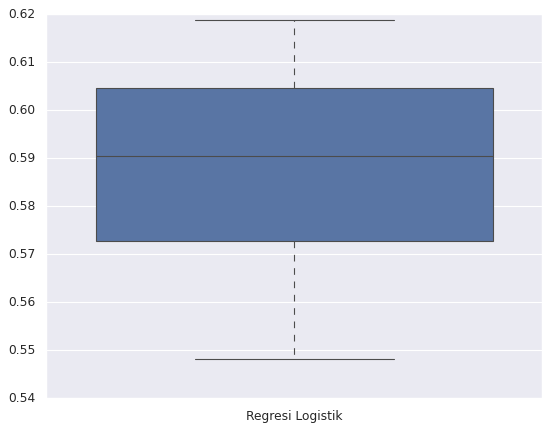

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt; plt.style.use('classic')
import seaborn as sns; sns.set()

df = pd.DataFrame({'Regresi Logistik':scores_kNN})
sns.boxplot(data=df)
plt.show()

##<font color="FEEB99"> **Regresi Logistik**

Disusun oleh : Fauzan Adzhima Alamsyah (1906376804)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class='ovr').fit(x_train, y_train)

In [ ]:
clf

LogisticRegression(multi_class='ovr')

In [ ]:
y_reglog = clf.predict(x_test)
y_reglog

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1,
       0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2,

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_reglog)

0.6836158192090396

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Specify the positive label as 'Graduate'
print('presisi  = ', precision_score(y_test, y_reglog, average='weighted'))
print('Recall   = ', recall_score(y_test, y_reglog, average='weighted'))
print('f1_score = ', f1_score(y_test, y_reglog, average='weighted'))

presisi  =  0.6568659877338668
Recall   =  0.6836158192090396
f1_score =  0.6374882384193984


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_reglog))
print(classification_report(y_test, y_reglog))

[[191  11  77]
 [ 39  16 109]
 [ 39   5 398]]
              precision    recall  f1-score   support

           0       0.71      0.68      0.70       279
           1       0.50      0.10      0.16       164
           2       0.68      0.90      0.78       442

    accuracy                           0.68       885
   macro avg       0.63      0.56      0.55       885
weighted avg       0.66      0.68      0.64       885



In [ ]:
from sklearn.model_selection import cross_val_score
import time

mulai = time.time()
scores_regLog = cross_val_score(clf, x_train, y_train, cv=10)
waktu = time.time() - mulai
# Interval Akurasi 95 CI
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.70 (+/- 0.03), Waktu = 12.091 detik


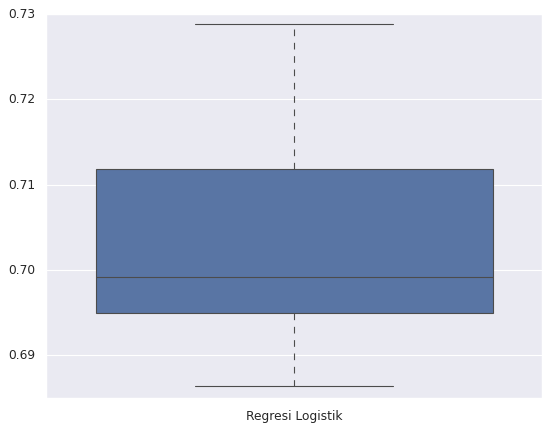

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt; plt.style.use('classic')
import seaborn as sns; sns.set()

df = pd.DataFrame({'Regresi Logistik':scores_regLog})
sns.boxplot(data=df)
plt.show()

##<font color="FEEB99"> **Naive Bayes**

Disusun oleh : Fauzan Adzhima Alamsyah (1906376804)

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
nbc = gnb.fit(x_train, y_train)
nbc_prediction = nbc.predict(x_test)

In [ ]:
print('Akurasi = ', accuracy_score(y_test, nbc_prediction))
print(confusion_matrix(y_test, nbc_prediction))
print(classification_report(y_test, nbc_prediction))

Akurasi =  0.672316384180791
[[182  36  61]
 [ 27  43  94]
 [ 37  35 370]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       279
           1       0.38      0.26      0.31       164
           2       0.70      0.84      0.77       442

    accuracy                           0.67       885
   macro avg       0.61      0.58      0.59       885
weighted avg       0.66      0.67      0.66       885



In [ ]:
from sklearn.model_selection import cross_val_score
import time

mulai = time.time()
scores_nb = cross_val_score(nbc, x_train, y_train, cv=10)
waktu = time.time() - mulai
# Interval Akurasi 95 CI
print("Accuracy Naive Bayes: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_nb.mean(), scores_nb.std() * 2, waktu))

Accuracy Naive Bayes: 0.69 (+/- 0.04), Waktu = 0.346 detik


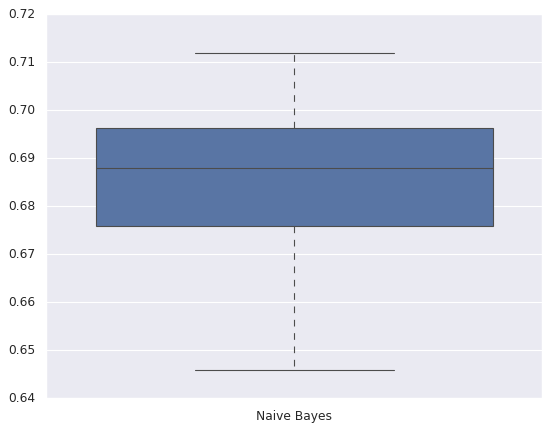

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt; plt.style.use('classic')
import seaborn as sns; sns.set()

df = pd.DataFrame({'Naive Bayes':scores_nb})
sns.boxplot(data=df)
plt.show()

##<font color="FEEB99">**Decision Tree**

In [ ]:
DT = tree.DecisionTreeClassifier()
DT = DT.fit(x_train, y_train)
y_DT1 = DT.predict(x_test)

print(confusion_matrix(y_test, y_DT1))
print(classification_report(y_test, y_DT1))

[[188  50  41]
 [ 39  67  58]
 [ 44  56 342]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       279
           1       0.39      0.41      0.40       164
           2       0.78      0.77      0.77       442

    accuracy                           0.67       885
   macro avg       0.62      0.62      0.62       885
weighted avg       0.68      0.67      0.68       885



In [ ]:
# Varible importance - Salah satu kelebihan Decision Tree
DT.feature_importances_

array([0.00356935, 0.02017273, 0.01498431, 0.03009875, 0.        ,
       0.00355634, 0.0402433 , 0.001655  , 0.01724373, 0.01838568,
       0.03084628, 0.02558359, 0.05247941, 0.00858211, 0.0007864 ,
       0.00469114, 0.05216354, 0.00522877, 0.00722828, 0.0385883 ,
       0.        , 0.00209706, 0.0124005 , 0.02958488, 0.03191057,
       0.04127888, 0.00573152, 0.00282933, 0.03609107, 0.02727539,
       0.34185598, 0.03495951, 0.00437679, 0.01658186, 0.01835332,
       0.01858633])

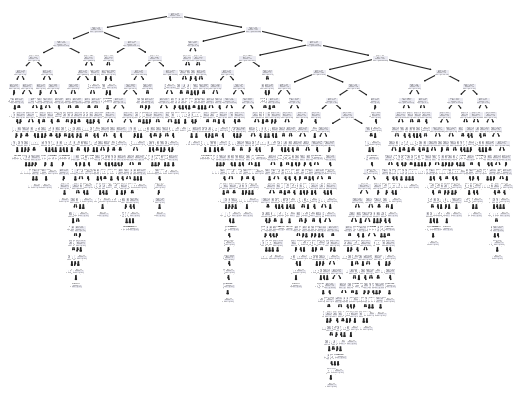

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(x_train, y_train)
p = tree.plot_tree(clf)

##<font color="FEEB99">**Random Forest**

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_rf1 = rf.predict(x_test)

print(confusion_matrix(y_test, y_rf1))
print(classification_report(y_test, y_rf1))

[[215  21  43]
 [ 31  56  77]
 [ 15  13 414]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       279
           1       0.62      0.34      0.44       164
           2       0.78      0.94      0.85       442

    accuracy                           0.77       885
   macro avg       0.74      0.68      0.70       885
weighted avg       0.76      0.77      0.76       885



Feature ranking:
1. feature 30 (0.141410)
2. feature 24 (0.104984)
3. feature 31 (0.100160)
4. feature 25 (0.060229)
5. feature 12 (0.043629)
6. feature 29 (0.041080)
7. feature 16 (0.039773)
8. feature 19 (0.039352)
9. feature 6 (0.037417)
10. feature 23 (0.035696)
11. feature 3 (0.031979)
12. feature 11 (0.027169)
13. feature 10 (0.024828)
14. feature 35 (0.023910)
15. feature 33 (0.023094)
16. feature 9 (0.021714)
17. feature 1 (0.021638)
18. feature 28 (0.021616)
19. feature 34 (0.020614)
20. feature 8 (0.020566)
21. feature 22 (0.018304)
22. feature 2 (0.013935)
23. feature 18 (0.013666)
24. feature 15 (0.012133)
25. feature 17 (0.010689)
26. feature 13 (0.008474)
27. feature 21 (0.007087)
28. feature 5 (0.006457)
29. feature 26 (0.005592)
30. feature 27 (0.005566)
31. feature 32 (0.005492)
32. feature 0 (0.004007)
33. feature 4 (0.002728)
34. feature 7 (0.002543)
35. feature 20 (0.001479)
36. feature 14 (0.000991)


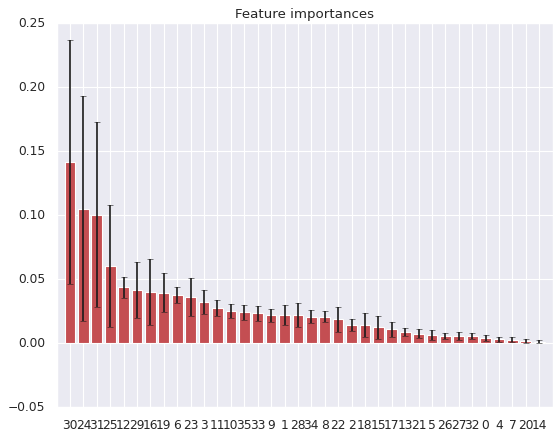

In [ ]:
# Varible importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

##<font color="FEEB99">**SVM**

In [ ]:
# Fitting and evaluate the model
dSVM = svm.SVC(C = 10**5, kernel = 'linear') # Misal menggunakan kernel Linear

dSVM.fit(x_train, y_train)
y_SVM1 = dSVM.predict(x_test)

print(confusion_matrix(y_test, y_SVM1))
print(classification_report(y_test, y_SVM1))

[[209  27  43]
 [ 42  48  74]
 [ 15  23 404]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       279
           1       0.49      0.29      0.37       164
           2       0.78      0.91      0.84       442

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.75      0.73       885



In [ ]:
# The Support Vectors
print('index dr SV-nya: ', dSVM.support_)
print('Vector Datanya: \n', dSVM.support_vectors_)

index dr SV-nya:  [  18   24   34 ... 3526 3528 3531]
Vector Datanya: 
 [[ 1.    1.    1.   ...  7.6   2.6   0.32]
 [ 1.   17.    1.   ...  9.4  -0.8  -3.12]
 [ 1.    1.    1.   ... 13.9  -0.3   0.79]
 ...
 [ 1.    1.    1.   ...  9.4  -0.8  -3.12]
 [ 1.    1.    3.   ... 13.9  -0.3   0.79]
 [ 1.   39.    1.   ...  7.6   2.6   0.32]]


In [ ]:
# Model Weights for interpretations
print('w = ',dSVM.coef_)
print('b = ',dSVM.intercept_)

w =  [[-5.21029707e+05  5.08954834e+01  4.78716022e+05  5.88272461e+02
   4.36775323e+05 -2.19075881e+04  1.71828584e+04  3.84188480e+04
   2.10654936e+04 -9.23708345e+02 -4.38698523e+03 -3.99245137e+04
  -2.91271204e+04  5.92239379e+05  0.00000000e+00  1.43111427e+06
  -3.16493212e+06  5.74595974e+05 -4.92318515e+05  2.77453404e+05
  -3.11539529e+05  5.04220013e+05  8.79829605e+04 -3.43953979e+05
  -3.29226625e+05  2.17262692e+05  3.76706786e+04  6.85478918e+05
   9.36469183e+05 -1.03625192e+05 -1.23715217e+06 -4.35624160e+05
  -4.58000126e+05  4.37253494e+05  2.55070663e+04  1.12164613e+04]
 [-7.28942151e+05  2.88808539e+04  2.42629342e+05  1.13515369e+03
  -5.57578382e+04 -4.09547159e+04  2.21677891e+04  2.52906706e+04
   9.45155654e+03 -4.00573001e+04 -5.58605819e+04  2.41859302e+04
  -3.00731877e+03  7.96994724e+03 -2.00000000e+05  2.25575119e+06
  -3.24803781e+06  1.23095200e+06 -7.01828954e+05  1.25508351e+05
  -4.26656025e+05  7.55170129e+05  1.05046943e+06 -2.81057870e+04
  -2

##<font color="FEEB99">**Cross Validation**

###**kNN**

In [ ]:
# Cross validation
# Perhatikan variabelnya, kita sekarang menggunakan seluruh data
# namun sebaiknya hanya Train data (jika datanya cukup besar)
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
mulai = time.time()
scores_kNN = cross_val_score(kNN, X, y, cv=10)
waktu = time.time() - mulai
# Interval Akurasi 95 CI
print("Accuracy k-NN: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_kNN.mean(), scores_kNN.std() * 2, waktu))

Accuracy k-NN: 0.60 (+/- 0.03), Waktu = 0.299 detik


0.5656108597285068

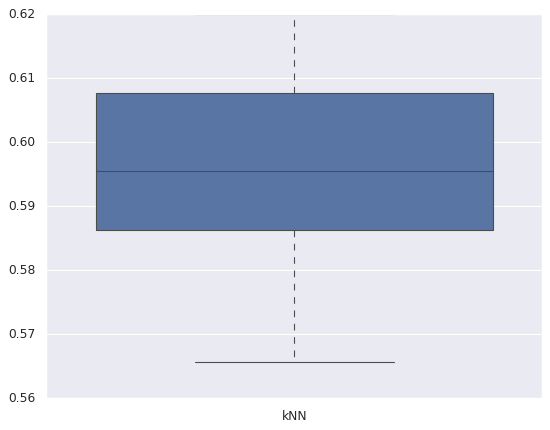

In [ ]:
# Visualisasi untuk mengevaluasi model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN})
p = sns.boxplot(data = df_)
min(scores_kNN)

###**Regresi Logistik**

In [ ]:
mulai = time.time()
scores_regLog = cross_val_score(clf, X, y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.68 (+/- 0.04), Waktu = 1.081 detik


,0
kNN,0.565611
RegLog,0.645598


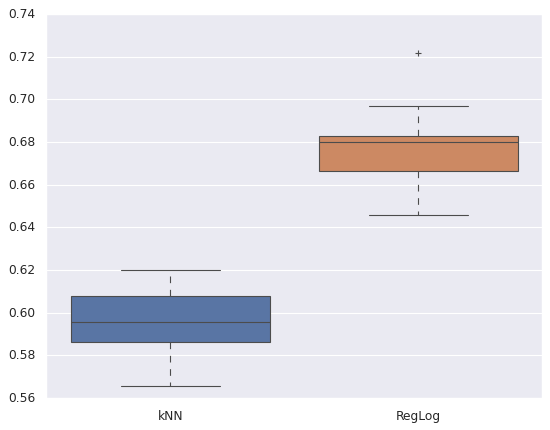

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN, 'RegLog': scores_regLog})
p = sns.boxplot(data = df_)
df_.min()

###**Naive Bayes**

In [ ]:
mulai = time.time()
scores_nb = cross_val_score(nbc, X, y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Naive Bayes: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_nb.mean(), scores_nb.std() * 2, waktu))

Accuracy Naive Bayes: 0.68 (+/- 0.03), Waktu = 0.141 detik


,0
kNN,0.565611
RegLog,0.645598
NaiveBys,0.651584


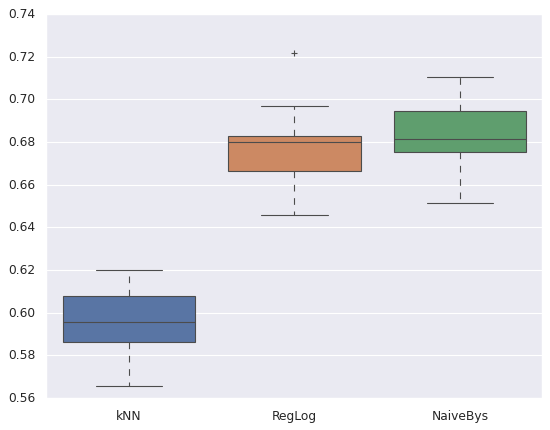

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN, 'RegLog': scores_regLog, 'NaiveBys':scores_nb})
p = sns.boxplot(data = df_)
df_.min()

###**Decision Tree**

In [ ]:
mulai = time.time()
scores_dt = cross_val_score(DT, X, y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.68 (+/- 0.05), Waktu = 0.643 detik


,0
kNN,0.565611
RegLog,0.645598
NaiveBys,0.651584
DecTree,0.650113


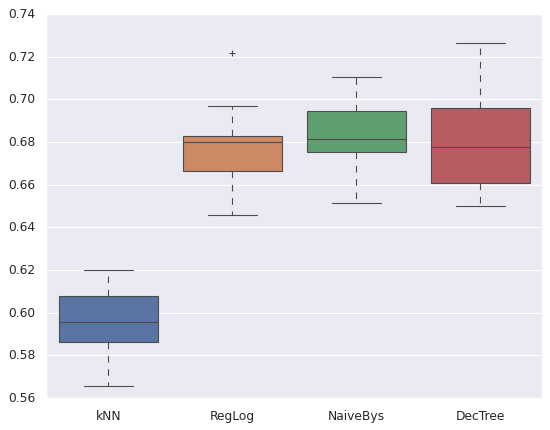

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN, 'RegLog': scores_regLog, 'NaiveBys':scores_nb, "DecTree":scores_dt})
p = sns.boxplot(data = df_)
df_.min()

###**Random Forest**

In [ ]:
mulai = time.time()
scores_rf = cross_val_score(rf, X, y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Random Forest: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_rf.mean(), scores_rf.std() * 2, waktu))

Accuracy Random Forest: 0.77 (+/- 0.04), Waktu = 10.046 detik


,0
kNN,0.565611
RegLog,0.645598
NaiveBys,0.651584
DecTree,0.650113
Forest,0.748869


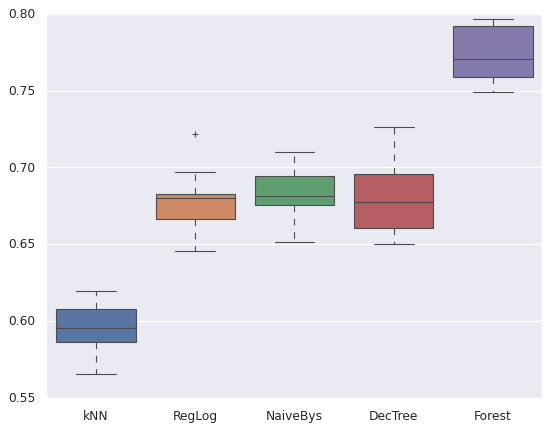

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN, 'RegLog': scores_regLog, 'NaiveBys':scores_nb, "DecTree":scores_dt, "Forest": scores_rf})
p = sns.boxplot(data = df_)
df_.min()

###**SVM**

In [ ]:
dSVM = svm.SVC(C = 10**5, kernel = 'linear')
mulai = time.time()
scores_svm = cross_val_score(dSVM, X, y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy SVM: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_svm.mean(), scores_svm.std() * 2, waktu))

Accuracy SVM: 0.76 (+/- 0.02), Waktu = 681.739 detik


,0
kNN,0.565611
RegLog,0.645598
NaiveBys,0.651584
DecTree,0.650113
Forest,0.748869
SVM,0.742081


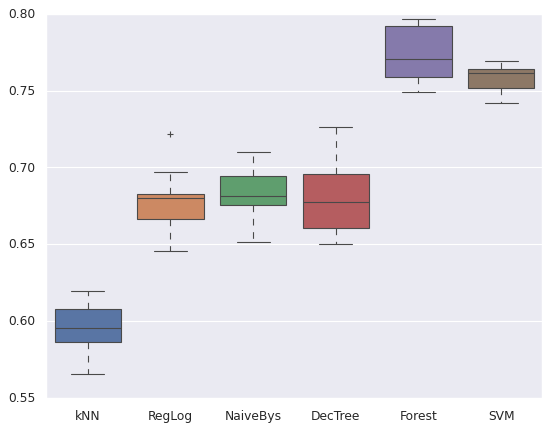

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_['SVM'] = scores_svm
p = sns.boxplot(data = df_)
df_.min()

100%|██████████| 6/6 [00:26<00:00,  4.49s/it]


Regresi Logistik [0.7697516930022573, 0.7742663656884876, 0.7584650112866818, 0.7584650112866818]
k-NN [0.6072234762979684, 0.6072234762979684, 0.6049661399548533, 0.5959367945823928]
Naive Bayes [0.6817155756207675, 0.6952595936794582, 0.6681715575620768, 0.7065462753950339]
Decision Tree [0.6591422121896162, 0.654627539503386, 0.6862302483069977, 0.6433408577878104]
Random Forest [0.7516930022573364, 0.7855530474040632, 0.7855530474040632, 0.7765237020316027]
SVM [0.4966139954853273, 0.49887133182844245, 0.49887133182844245, 0.49887133182844245]


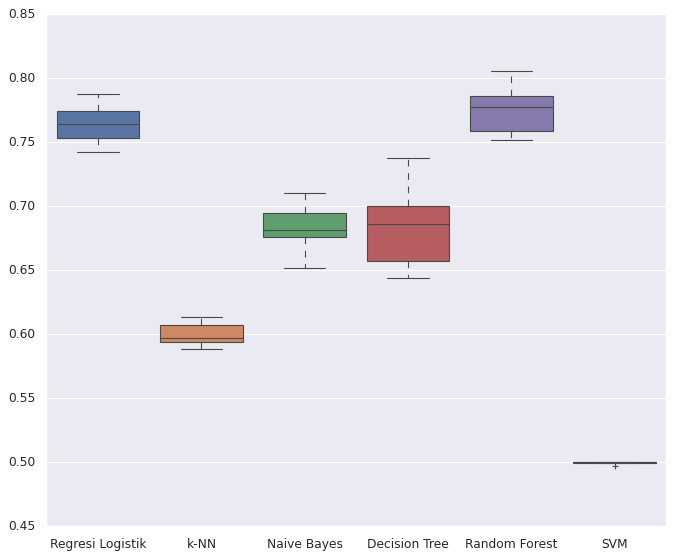

In [ ]:
clf = LogisticRegression(solver='liblinear')
kNN = neighbors.KNeighborsClassifier()
gnb = GaussianNB()
dt = tree.DecisionTreeClassifier()
rf = RandomForestClassifier()
svm_ = svm.SVC()

Models = [('Regresi Logistik', clf), ('k-NN',kNN), ('Naive Bayes',gnb), ('Decision Tree', dt), ('Random Forest', rf), ('SVM', svm_)]
Scores = {}
for model_name, model in tqdm(Models):
    Scores[model_name] = cross_val_score(model, X, y, cv=10, scoring='accuracy')

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
dt = pd.DataFrame.from_dict(Scores)
ax = sns.boxplot(data=dt, ax=ax)
for m, s in Scores.items():
    print(m, list(s)[:4])

##<font color="FEEB99">**Hyperparameter Tuning**

Disusun oleh: Zavier Raiyan Dana

In [ ]:
# Hyperparameter optimization pada model kNN menggunakan gridCV
kCV = 10
metric = 'accuracy'
params = {}
params['kneighborsclassifier__n_neighbors'] = [1, 3, 5, 10, 15, 20, 25, 30]
params['kneighborsclassifier__weights'] = ('distance', 'uniform')

pipe = make_pipeline(neighbors.KNeighborsClassifier())
optKnn = GridSearchCV(pipe, params, cv=kCV, scoring=metric, verbose=1, n_jobs=-2) #
optKnn.fit(x_train, y_train)
print(optKnn.best_score_)
print(optKnn.best_params_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
0.6196699796738209
{'kneighborsclassifier__n_neighbors': 15, 'kneighborsclassifier__weights': 'distance'}


In [ ]:
pipeSVM = make_pipeline(svm.SVC())
print(sorted(pipeSVM.get_params().keys()))

['memory', 'steps', 'svc', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose', 'verbose']


In [ ]:
# Optimal parameter SVM dengan RandomizedSearch

kCV = 10
paramsSVM = {}
paramsSVM['svc__C'] = [1, 10, 100, 1000] #sp.stats.uniform(scale=100)
paramsSVM['svc__gamma'] = [0.1, 0.001, 0.0001, 1, 10]
paramsSVM['svc__kernel'] = ['rbf', 'sigmoid', 'linear'] # , 'poly'
optSvm = RandomizedSearchCV(pipeSVM, paramsSVM, cv=kCV, scoring=metric, verbose=2, n_jobs=-2) # refit=True, pre_dispatch='2*n_jobs' pre_dispatch min 2* n_jobs
optSvm.fit(x_train, y_train)
print(optSvm.best_score_)
print(optSvm.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ......svc__C=100, svc__gamma=10, svc__kernel=linear; total time= 1.0min
[CV] END ......svc__C=100, svc__gamma=10, svc__kernel=linear; total time=  50.7s
[CV] END ......svc__C=100, svc__gamma=10, svc__kernel=linear; total time=  54.6s
[CV] END ......svc__C=100, svc__gamma=10, svc__kernel=linear; total time=  37.2s
[CV] END ......svc__C=100, svc__gamma=10, svc__kernel=linear; total time=  30.0s
[CV] END ......svc__C=100, svc__gamma=10, svc__kernel=linear; total time= 1.1min
[CV] END ......svc__C=100, svc__gamma=10, svc__kernel=linear; total time=  36.2s
[CV] END ......svc__C=100, svc__gamma=10, svc__kernel=linear; total time= 1.1min
[CV] END ......svc__C=100, svc__gamma=10, svc__kernel=linear; total time= 1.8min
[CV] END ....svc__C=1000, svc__gamma=0.0001, svc__kernel=rbf; total time=   2.3s
[CV] END ....svc__C=1000, svc__gamma=0.0001, svc__kernel=rbf; total time=   3.2s
[CV] END ....svc__C=1000, svc__gamma=0.0001, s

Accuracy kNN: 0.53 (+/- 0.07)
Accuracy SVM: 0.71 (+/- 0.12)


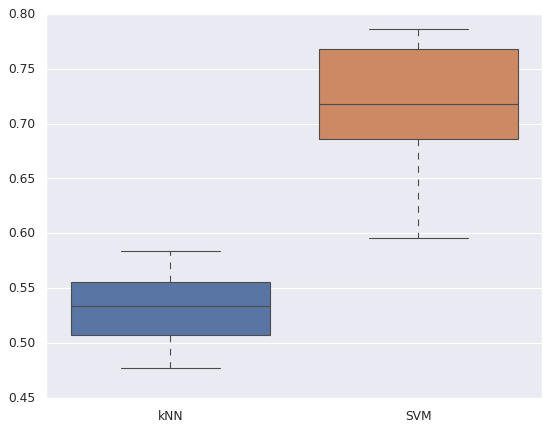

In [ ]:
kCV = 10
# Menggunakan parameter optimal
kNN = neighbors.KNeighborsClassifier(n_neighbors= 20, weights= 'uniform')
svm_ = svm.SVC(kernel= 'linear', gamma= 10, C= 10)

# Melakukan Cross Validasi
models = ['kNN', 'SVM']
knn_score = cross_val_score(kNN, x_test, y_test, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=1)
svm_score = cross_val_score(svm_, x_test, y_test, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=1)
scores = [knn_score, svm_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
p = sns.boxplot(data=pd.DataFrame(data), ax=ax)

# **Kesimpulan**

1. Performa Model:
  - Model SVM dengan parameter yang dioptimalkan menunjukkan performa yang lebih baik dibandingkan model KNN, dengan akurasi rata-rata 71% dibandingkan 53%.
  - Variabilitas (standar deviasi) pada SVM lebih besar dibandingkan KNN, tetapi tetap menunjukkan performa rata-rata yang lebih unggul.

2. Hasil Hyperparameter Tuning:
  - Hyperparameter tuning berhasil menemukan kombinasi parameter optimal untuk masing-masing model.
  - Kombinasi optimal ini berkontribusi pada peningkatan performa kedua model pada data validasi.

3. Rekomendasi:
  - Jika akurasi menjadi prioritas, model SVM lebih disarankan untuk digunakan.
  - Model KNN memiliki akurasi lebih rendah, mungkin karena dataset memerlukan model yang lebih kompleks untuk menangkap pola data.


##<font color="FEEB99">**Ensemble Model**

Disusun oleh : Rachelle Melody d'Lyra Soentara (2206051456)

### Voting (Bagging)

In [ ]:
# Contoh Voting (Bagging) di Python

kNN = neighbors.KNeighborsClassifier(3)
kNN.fit(x_train, y_train)
Y_kNN = kNN.score(x_test, y_test)

DT = tree.DecisionTreeClassifier(random_state=1)
DT.fit(x_train, y_train)
Y_DT = DT.score(x_test, y_test)

model = VotingClassifier(estimators=[('k-NN', kNN), ('Decision Tree', DT)], voting='hard')
model.fit(x_train,y_train)
Y_Vot = model.score(x_test,y_test)

print('Akurasi k-NN', Y_kNN)
print('Akurasi Decision Tree', Y_DT)
print('Akurasi Votting', Y_Vot)

Akurasi k-NN 0.5943502824858757
Akurasi Decision Tree 0.6757062146892655
Akurasi Votting 0.6135593220338983


- k-NN akurasinya = 59.4%, artinya model dengan metode k-NN sendiri memiliki performa sedang
- Decision Tree akurasinya = 67.6% artinya performa dari DT lebih baik dari k-NN dalam data ini
- Dengan ensemble kedua metode, akurasi = 61.36%, berada lebih tinggi dari akurasi k-NN tetapi lebih rendah dari akurasi

**Kesimpulannya** : majority voting tidak selalu meningkatkan eprforma, dalam kasus ini, model Decision Tree lebih baik dari k-NN dan model ensemble voting.

### Averaging

In [ ]:
# Averaging juga bisa digunakan di Klasifikasi (ndak hanya Regresi),
# tapi kita pakai probabilitas dari setiap kategori
T = tree.DecisionTreeClassifier()
K = neighbors.KNeighborsClassifier()
R = LogisticRegression()

T.fit(x_train,y_train)
K.fit(x_train,y_train)
R.fit(x_train,y_train)

y_T=T.predict_proba(x_test)
y_K=K.predict_proba(x_test)
y_R=R.predict_proba(x_test)

Ave = (y_T+y_K+y_R)/3
print(Ave[:5]) # Print just first 5
prediction = [v.index(max(v)) for v in Ave.tolist()]
print(prediction[:5]) # Print just first 5
print('Akurasi Averaging', accuracy_score(y_test, prediction))

[[0.08068236 0.03264432 0.88667331]
 [0.19163864 0.09594206 0.7124193 ]
 [0.19153297 0.24317005 0.56529698]
 [0.07934291 0.02219701 0.89846008]
 [0.28565759 0.13722124 0.57712117]]
[2, 2, 2, 2, 2]
Akurasi Averaging 0.7141242937853107


- array output pertama adalah predicted probability untuk 5 sampel test pertama dari tiap kelas
- output selanjutnya : ([2, 2, 2, 2, 1]) menunjukkan predicted classes untuk 5 sample pertama, mengindikasikan kelas dengan average probability tertinggi yaitu 2 : graduate, 1 : enrolled.
- Akurasi dari metode averaging ini = 70.96%, dimana lebih baik dari performa k-NN dan Voting Classifier

**Kesimpulannya** : probability averaging dapat meningkatkan klasifikasi performa ketika base model berkontribusi sebagai prediksi pelengkap

### Adaboost

In [ ]:
# AdaBoost
num_trees = 100
kfold = model_selection.KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=33)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7601779312176337


**Kesimpulan** : mean akurasi = 76% artinya merupakan average accuracy dari 10 train-test split berbeda. Metode Adaboost meningkatkan performa signifikan dibandingkan metode sebelumnya (k-NN, Voting Classifier, dan Averaging). Hal ini karena kemampuannya untuk meningkatkan performa dari weak classifiers.

### Kesimpulan Ketiga Metode

- Voting: menyatukan beberapa model dengan hard voting tetapi tidak selalu menyebabkan performa meningkat jika salah satu model mendominasi.
- Averaging: menggunakan probability untuk membuat predictions, menyebabkan performance lebih baik (71.8% accuracy).
- AdaBoost: boosting ensemble yang memiliki performa tertinggi (76.0%) dengan berfokus pada misclassified samples ketika training.

### Imbalance Learning

In [ ]:
# Count the occurrences of each value in the 'Target' column
counts = y['Target'].value_counts()

# Print the counts
print(counts)

Target
2    2209
0    1421
1     794
Name: count, dtype: int64


Dapat dilihat imbalance data berada pada Target : 1 (Enrolled), dimana data ini underrepresented relatif terhadap kelas lain yaitu 0 : Dropout dan 2 : Graduate.

#### Standard SVM tanpa Class Weights

In [ ]:
# fit the model and get the separating hyperplane using weighted classes

svm_ = svm.SVC(kernel='linear')
svm_.fit(x_train, y_train)
y_SVMib = svm_.predict(x_test)

print(confusion_matrix(y_test, y_SVMib))
print(classification_report(y_test, y_SVMib))

[[214  23  42]
 [ 41  51  72]
 [ 18  23 401]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       279
           1       0.53      0.31      0.39       164
           2       0.78      0.91      0.84       442

    accuracy                           0.75       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.73      0.75      0.74       885



- Dengan standard linear SVM tanpa class weight pada imbalance data dilakukan.
- Metode ini sering membuat klasifikasi condong ke kelas mayoritas

**Interpretasi Output** :    
Pada kelas 0 yaitu Dropout (mayoritas) : 78% predicted class 0 benar, 77% dari actual class 0 benar diidentifikasi, prediksi baik karena kedominannya.

Pada kelas 2 yaitu Graduate (mayoritas) : 78% predicted class 2 benar, 91% dari actual class 2 benar diidentifikasi, prediksi baik karena kedominannya.

Pada kelas 1 yaitu Enrolled (minoritas) : 53% predicted class 1 benar, hanya 31% dari actual class 1 diidentifikasi benar, prediksi kurang baik karena imbalanced.

#### Weighted SVM

In [ ]:
# fit the model and get the separating hyperplane using weighted classes
# x_train, x_test, y_train, y_test

svm_balanced = svm.SVC(kernel='linear', class_weight={1: 3}) #WEIGHTED SVM
svm_balanced.fit(x_train, y_train)
y_SVMb = svm_balanced.predict(x_test)

print(confusion_matrix(y_test, y_SVMb))
print(classification_report(y_test, y_SVMb))

[[158  94  27]
 [ 10 121  33]
 [  8  94 340]]
              precision    recall  f1-score   support

           0       0.90      0.57      0.69       279
           1       0.39      0.74      0.51       164
           2       0.85      0.77      0.81       442

    accuracy                           0.70       885
   macro avg       0.71      0.69      0.67       885
weighted avg       0.78      0.70      0.72       885



- Dilakukan Weighted SVM dengan mengassign higher penaly terhadap misclassifications dalam kelas 1 dimana (class_weight={1: 3}) untuk balancing efek dari kelas underrepresented.
- The F1-score adalah metrik untuk evaluate performa model klasifikasi, terutama untuk data imbalanced. Menggabungkan precision dan recall untuk menghasilkan balanced measure, walaupun distribusi kelasnya tidak sama.



**Interpretasi Output** :     
Pada kelas 0 : presisi 0.9 (tinggi), recall 0.57 maka beberapa kelas 0 salah diprediksi sebagai kelas lain, F1 score turun ke 0.69 dibanding unweighted SVM

Pada kelas 1 : presisi 0.39 (turun sedikit), artinya lebih banyak sample salah diprediksi. Recall 0.74 meningkat dibanding unweighted, mengindikasi model ini lebih baik dalam mengidentifikasi sampel kelas 1. F1 score juga meningkat ke 0.51.

Pada kelas 2 : presisi 0.85 (baik), recall 0.77 (menurun), performa di kelas 2 tinggi tetapi berkurang dibandingkan unweighted SVM.


**Secara Keseluruhan** :      
Akurasi keseluruhan turun ke 70%, mencerminkan trade off untuk meningkatkan performa kelas minoritas.

#### Weighted Decision Tree</font></center>

In [ ]:
T = tree.DecisionTreeClassifier(random_state = 33)
T.fit(x_train,y_train)
y_DT = T.predict(x_test)
print('Akurasi  (Decision tree Biasa) = ', accuracy_score(y_test, y_DT))
print(classification_report(y_test, y_DT))

T = tree.DecisionTreeClassifier(class_weight = 'balanced', random_state = 33)
T.fit(x_train, y_train)
y_DT = T.predict(x_test)
print('Akurasi  (Weighted Decision tree) = ', accuracy_score(y_test, y_DT))
print(classification_report(y_test, y_DT))

Akurasi  (Decision tree Biasa) =  0.6790960451977401
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       279
           1       0.38      0.36      0.37       164
           2       0.76      0.80      0.78       442

    accuracy                           0.68       885
   macro avg       0.62      0.61      0.61       885
weighted avg       0.67      0.68      0.68       885

Akurasi  (Weighted Decision tree) =  0.6768361581920904
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       279
           1       0.38      0.37      0.37       164
           2       0.76      0.78      0.77       442

    accuracy                           0.68       885
   macro avg       0.62      0.62      0.62       885
weighted avg       0.68      0.68      0.68       885



- Dilakukan perbandingan performa ketika model Decision Tree biasa dan juga ketika model Decision Tree Weighted.

**Interpretasi Output** :    
- Performa dari kedua metode biasa dan weighted DT memiliki akurasi yang mirip (sekitar 68%). hasil klasifikasinya mungkin akan menampilkan perbedaan dalam sebaik mana masing-masing classifier mengatasi kelas imbalanced.
- Weighted DT : bertujuan meningkatkan performa pada kelas yang underrepresented dalam data training.
- Namun, dapat dilihat pada kelas 0 dan 2, kedua model performanya mirip (memiliki precision, recall, dan F1 scores yang tinggi). Kedua model pada kelas 0 juga mirip, dimana precision, recall, dan F1-scores tidak terlalu tinggi.
- Dalam kasus ini, maka weighted decision tree tidak terlihat meningkatkan performa klasifikasi kelas 1 secara signifikan. Penyebabnya mungkin antara lain :    
  - ketidak seimbangan diantara kelas-kelasnya tidak terlalu extreme untuk menjamin penggunaan dari metode weighted.
  - model terlalu kompleks atau terlalu simple untuk kasus ini.

#### Kesimpulan Insight

- **Ketidak seimbangan data** : mahasiswa berstatus Enrolled (1) paling rentan salah diprediksi, artinya kelompok ini membutuhkan perhatian lebih karena :    
  - berada dalam kondisi transisi akademik
  - sumber data dan informasi mahasiswa yang sedang dalam pendidikan lebih sedikit dari graduate dan dropout

- **Prediksi kelas mayoritas** : mayoritas merupakan Graduate, dimana model juga lebih akurat dalam memprediksi mahasiswa yang lulus (2), tetapi cenderung mengabaikan mahasiswa Enrolled atau Dropout. Artinya, model tanpa weighted / penyesuaian untuk imbalanced data tidak cukup sensitif dalam mengidentifikasi mahasiswa yang beresiko gagal.

- **Kelebihan/Kekurangan metode** :     
  - Averaging : akurasi cukup tinggi, tetapi lebih memprioritaskan kelas berprobabilitas tertinggi (Graduate) sehingga tidak cocok sebagai metode kelompok minoritas (Dropout dan Enrolled).
  - Weighted SVM : lebih adil dalam menangani data imbalanced, dapat dilihat precision dan recall Graduate dan Enrolled secara general meningkat, maka dapat dijadikan kandidat model utama.
  - Decision tree : meski sudah diberi weight, kurang meningkatkan akurasi dan keseimbangan secara signifikan terhadap kelas minoritas.

### Saran Tindak Lanjut

1. **Identifikasi Berdasarkan Data Akademik**

Fokus pada mahasiswa Enrolled (1) karena kelompok ini rentan mengalami kesalahan prediksi. Tambahkan parameter prediksi, misal : nilai ujian, kehadiran, keterlibatan akademik untuk memberikan konteks lebih.

2. **Strategi untuk Kategori Enrolled**
Kelompok ini butuh pengawasan rutin untuk memastikan mereka tetap berada di jalur untuk lulus.
Bisa dilakukan :
  - Buat program mentoring dengan mahasiswa senior.
  - Pantau performa per semester.
  - Gunakan Weighted SVM sebagai pendekatan utama untuk menangani ketidakseimbangan data.

3. Gunakan sistem dashboard analitik untuk memantau mahasiswa secara real-time berdasarkan kategori risiko. Bisa didesign untuk ada notifikasi otomatis kepada pembimbing akademik jika mahasiswa menunjukkan pola risiko, misalnya penurunan nilai ekstrim atau absensi tinggi.